In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('SearchResults.csv')
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT02266147,Study of SD-101 in Combination With Localized ...,NaN,Completed,No Results Available,B-cell Lymphoma,Drug: SD-101|Radiation: Radiation therapy,Number of participants experiencing dose-limit...,Dynavax Technologies Corporation,...,DV3-LYM-01,October 2014,April 2017,April 2017,"October 16, 2014",NaN,"March 1, 2018","Stanford University School of Medicine, Stanfo...",NaN,https://ClinicalTrials.gov/show/NCT02266147
1,2,NCT02055924,Bruton's Tyrosine Kinase (BTK) Inhibition in B...,BIBLOS,Recruiting,No Results Available,B-cell Lymphoma,Drug: Ibrutinib and immunochemotherapies,The primary endpoint is the incidence rate of ...,The Lymphoma Academic Research Organisation|Ja...,...,BIBLOS,May 2014,October 2018,November 2019,"February 5, 2014",NaN,"March 7, 2018","Universite Catholique de Louvain Saint Luc, Br...",NaN,https://ClinicalTrials.gov/show/NCT02055924
2,3,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,NaN,"Active, not recruiting",No Results Available,B-Cell Lymphoma,Drug: CPI-1205,Frequency of Dose-limiting toxicities (DLTs)|F...,Constellation Pharmaceuticals,...,1205-01,March 2015,October 2018,January 2019,"March 23, 2015",NaN,"March 5, 2018","Horizon Oncology Center, Lafayette, Indiana, U...",NaN,https://ClinicalTrials.gov/show/NCT02395601
3,4,NCT00162656,Treatment of Mature B-cell Lymphoma/Leukaemia,NaN,Completed,No Results Available,B-Cell Lymphoma,Drug: half cyclophosphamide|Drug: without COPA...,Event free survival|Survival|long term toxicity,"Gustave Roussy, Cancer Campus, Grand Paris",...,FAB LMB96,May 1996,May 2004,May 2011,"September 13, 2005",NaN,"March 28, 2012",Morgan Stanley Childrens Hospital of New York ...,NaN,https://ClinicalTrials.gov/show/NCT00162656
4,5,NCT03424122,"INCB050465 in Combination With Rituximab, Bend...",NaN,Recruiting,No Results Available,B-cell Lymphoma,Drug: INCB050465|Drug: Rituximab|Drug: Bendamu...,Number of treatment-emergent adverse events (T...,Incyte Corporation,...,INCB 50465-112 (CITADEL-112),"June 7, 2018","December 13, 2019","December 13, 2020","February 6, 2018",NaN,"August 23, 2018","Comprehensive Cancer Centers of Nevada, Las Ve...",NaN,https://ClinicalTrials.gov/show/NCT03424122


In [3]:
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [4]:
cols_to_drop = ['Acronym', 'Status', 'Study Results',
        'Outcome Measures','Sponsor/Collaborators', 'Gender', 'Age', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted',
       'Study Documents']

for col in cols_to_drop:
    data = data.drop([col],axis=1)
data.head()

,Rank,NCT Number,Title,Conditions,Interventions,Phases,Locations,URL
0,1,NCT02266147,Study of SD-101 in Combination With Localized ...,B-cell Lymphoma,Drug: SD-101|Radiation: Radiation therapy,Phase 1|Phase 2,"Stanford University School of Medicine, Stanfo...",https://ClinicalTrials.gov/show/NCT02266147
1,2,NCT02055924,Bruton's Tyrosine Kinase (BTK) Inhibition in B...,B-cell Lymphoma,Drug: Ibrutinib and immunochemotherapies,Phase 1,"Universite Catholique de Louvain Saint Luc, Br...",https://ClinicalTrials.gov/show/NCT02055924
2,3,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,B-Cell Lymphoma,Drug: CPI-1205,Phase 1,"Horizon Oncology Center, Lafayette, Indiana, U...",https://ClinicalTrials.gov/show/NCT02395601
3,4,NCT00162656,Treatment of Mature B-cell Lymphoma/Leukaemia,B-Cell Lymphoma,Drug: half cyclophosphamide|Drug: without COPA...,Phase 3,Morgan Stanley Childrens Hospital of New York ...,https://ClinicalTrials.gov/show/NCT00162656
4,5,NCT03424122,"INCB050465 in Combination With Rituximab, Bend...",B-cell Lymphoma,Drug: INCB050465|Drug: Rituximab|Drug: Bendamu...,Phase 1,"Comprehensive Cancer Centers of Nevada, Las Ve...",https://ClinicalTrials.gov/show/NCT03424122


In [5]:
data['Phase_1'] = pd.np.where(data['Phases'].str.contains("Phase 1\w*"),1,0)
data['Phase_2'] = pd.np.where(data['Phases'].str.contains("\w*Phase 2\w*"),1,0)
data['Phase_3'] = pd.np.where(data['Phases'].str.contains("\w*Phase 3\w*"),1,0)
data = data.drop(['Phases'],axis=1)
                         # Раскидал Phases in dummy"""

data['B-cell'] = pd.np.where(data['Conditions'].str.contains("\w*B-Cell Lymphoma\w*"),1,0)
data = data.drop(['Conditions'],axis=1)
                        #Определили, где есть B-Cell lymphoma"""


                       #  Определяем по лекарствам из условий
ch_list = ['Rituximab','Cyclophosphamide','Mycophenolate','Mofetil','Gemcitabine','Bortezomib','R-CHOP',
           'R-DHAP','JCAR017','inhibitor','MK2206','acid']
data['Interventions'].fillna("Niht",inplace=True)
data.head(15)

for ch in ch_list:
    data[ch] = pd.np.where(data['Interventions'].str.contains("\w*"+ch+"\w*"),1,0)

data = data.drop(['Interventions'],axis=1)
data.head(14)

,Rank,NCT Number,Title,Locations,URL,Phase_1,Phase_2,Phase_3,B-cell,Rituximab,...,Mycophenolate,Mofetil,Gemcitabine,Bortezomib,R-CHOP,R-DHAP,JCAR017,inhibitor,MK2206,acid
0,1,NCT02266147,Study of SD-101 in Combination With Localized ...,"Stanford University School of Medicine, Stanfo...",https://ClinicalTrials.gov/show/NCT02266147,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,NCT02055924,Bruton's Tyrosine Kinase (BTK) Inhibition in B...,"Universite Catholique de Louvain Saint Luc, Br...",https://ClinicalTrials.gov/show/NCT02055924,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,"Horizon Oncology Center, Lafayette, Indiana, U...",https://ClinicalTrials.gov/show/NCT02395601,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,NCT00162656,Treatment of Mature B-cell Lymphoma/Leukaemia,Morgan Stanley Childrens Hospital of New York ...,https://ClinicalTrials.gov/show/NCT00162656,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NCT03424122,"INCB050465 in Combination With Rituximab, Bend...","Comprehensive Cancer Centers of Nevada, Las Ve...",https://ClinicalTrials.gov/show/NCT03424122,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,NCT02247609,Evaluation of 4th Generation Safety-designed C...,"Peking University Cancer Hospital, Beijing, Be...",https://ClinicalTrials.gov/show/NCT02247609,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,NCT01478269,Prognosis Of Patients With Aggressive B-Cell L...,"Hemocentro-Unicamp, Campinas, Brazil|Centro Me...",https://ClinicalTrials.gov/show/NCT01478269,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8,NCT03664336,Refractory Diffuse Large B-cell Lymphoma,"Centre Hospitalier Lyon Sud, Pierre-Bénite, Fr...",https://ClinicalTrials.gov/show/NCT03664336,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,NCT02433795,Bendamustine Plus Rituximab (BR) for Relapsed ...,"Chonbuk National University Hospital, Jeonju, ...",https://ClinicalTrials.gov/show/NCT02433795,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,NCT03258047,Novel Autologou CAR-T Therapy for Relapsed/Ref...,The first affiliated hospital of Zhejiang Univ...,https://ClinicalTrials.gov/show/NCT03258047,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords

In [7]:
tf_transformer = TfidfTransformer()
count_vect = CountVectorizer()
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
stopWords = stopwords.words('english')

In [8]:
title_text = data['Title'].map(str)                                #  Превращаем в строки
loc_text = data['Locations'].map(str)

text_counts_title = count_vect.fit_transform(title_text)           # Проделываем Count-Vect, TfIdf, SVD преобразования
text_tfidf_title = tf_transformer.fit_transform(text_counts_title) # Сначала Title
text_lsa_title = svd.fit_transform(text_tfidf_title)
    

text_counts_loc = count_vect.fit_transform(loc_text)               # Потом Location
text_tfidf_loc = tf_transformer.fit_transform(text_counts_loc)
text_lsa_loc = svd.fit_transform(text_tfidf_loc)

for i in range(10):                                               # Добавляем эти признаки к DataFrame
    data['text_lsa_title_'+str(i)]=text_lsa_title[:,i]
    data['text_lsa_loc_'+str(i)]=text_lsa_loc[:,i]
data.head()

,Rank,NCT Number,Title,Locations,URL,Phase_1,Phase_2,Phase_3,B-cell,Rituximab,...,text_lsa_title_5,text_lsa_loc_5,text_lsa_title_6,text_lsa_loc_6,text_lsa_title_7,text_lsa_loc_7,text_lsa_title_8,text_lsa_loc_8,text_lsa_title_9,text_lsa_loc_9
0,1,NCT02266147,Study of SD-101 in Combination With Localized ...,"Stanford University School of Medicine, Stanfo...",https://ClinicalTrials.gov/show/NCT02266147,1,1,0,0,0,...,-0.027005,-0.057191,0.070554,0.025985,-0.029628,0.142289,-0.164037,-0.048164,0.074157,-0.015236
1,2,NCT02055924,Bruton's Tyrosine Kinase (BTK) Inhibition in B...,"Universite Catholique de Louvain Saint Luc, Br...",https://ClinicalTrials.gov/show/NCT02055924,1,0,0,0,0,...,-0.005199,-0.246872,-0.002250,-0.019222,-0.002917,0.008771,-0.017688,-0.021139,0.019322,-0.106402
2,3,NCT02395601,A Study Evaluating CPI-1205 in Patients With B...,"Horizon Oncology Center, Lafayette, Indiana, U...",https://ClinicalTrials.gov/show/NCT02395601,1,0,0,1,0,...,0.010598,-0.021133,0.013093,0.053577,-0.021744,0.077290,-0.086359,-0.135487,-0.011305,0.038263
3,4,NCT00162656,Treatment of Mature B-cell Lymphoma/Leukaemia,Morgan Stanley Childrens Hospital of New York ...,https://ClinicalTrials.gov/show/NCT00162656,0,0,1,1,0,...,-0.091378,-0.164249,0.019919,-0.162630,0.123785,-0.176007,0.071317,0.146860,-0.069339,0.137888
4,5,NCT03424122,"INCB050465 in Combination With Rituximab, Bend...","Comprehensive Cancer Centers of Nevada, Las Ve...",https://ClinicalTrials.gov/show/NCT03424122,1,0,0,0,1,...,0.077136,0.163179,0.051462,0.003790,-0.220142,-0.086174,0.126154,0.006721,0.102115,0.041852


In [9]:
data.columns
data = data.drop(['Rank', 'NCT Number', 'Title', 'Locations', 'URL'],axis=1)
data.head()

,Phase_1,Phase_2,Phase_3,B-cell,Rituximab,Cyclophosphamide,Mycophenolate,Mofetil,Gemcitabine,Bortezomib,...,text_lsa_title_5,text_lsa_loc_5,text_lsa_title_6,text_lsa_loc_6,text_lsa_title_7,text_lsa_loc_7,text_lsa_title_8,text_lsa_loc_8,text_lsa_title_9,text_lsa_loc_9
0,1,1,0,0,0,0,0,0,0,0,...,-0.027005,-0.057191,0.070554,0.025985,-0.029628,0.142289,-0.164037,-0.048164,0.074157,-0.015236
1,1,0,0,0,0,0,0,0,0,0,...,-0.005199,-0.246872,-0.002250,-0.019222,-0.002917,0.008771,-0.017688,-0.021139,0.019322,-0.106402
2,1,0,0,1,0,0,0,0,0,0,...,0.010598,-0.021133,0.013093,0.053577,-0.021744,0.077290,-0.086359,-0.135487,-0.011305,0.038263
3,0,0,1,1,0,0,0,0,0,0,...,-0.091378,-0.164249,0.019919,-0.162630,0.123785,-0.176007,0.071317,0.146860,-0.069339,0.137888
4,1,0,0,0,1,0,0,0,0,0,...,0.077136,0.163179,0.051462,0.003790,-0.220142,-0.086174,0.126154,0.006721,0.102115,0.041852


In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, init='random', random_state=0)   # Преобразование в 2D признаковое пространство, 
X_t = tsne.fit_transform(data_scaled)                        #  чтобы тупо глянуть))

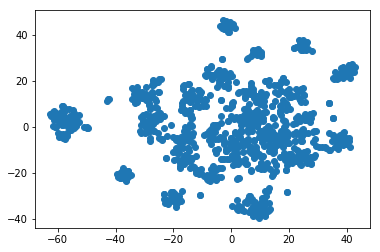

In [13]:
plt.scatter(X_t[:, 0], X_t[:, 1]);   # Симпатишненько получилось


In [14]:
tsne = TSNE(n_components=3, init='random', random_state=42)
X_t3 = tsne.fit_transform(data_scaled)


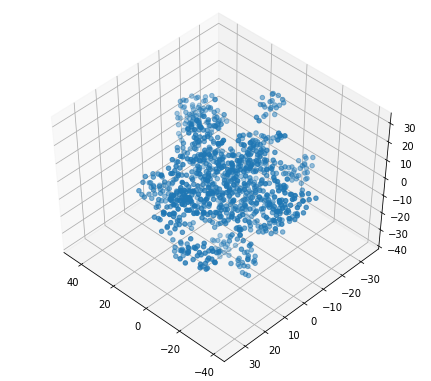

In [15]:
from mpl_toolkits.mplot3d import Axes3D          # Тут попробовал в 3D, но получилось менее наглядно
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.scatter(X_t3[:, 0], X_t3[:, 1], X_t3[:, 2])

Далее уже результат большого цикла. Там я прогонял n_clusters от 2 до 50, считал коэффициент силуэта.
Лучше всего получилось при n_clusters = 24, s=0.5295684.
Далее собственно раскрашиваем картинку от TSNE тем, что получили и пишем в dataframe метку классов

Text(0.5,1,'T-SNE projection_24_clusters by KMeans')

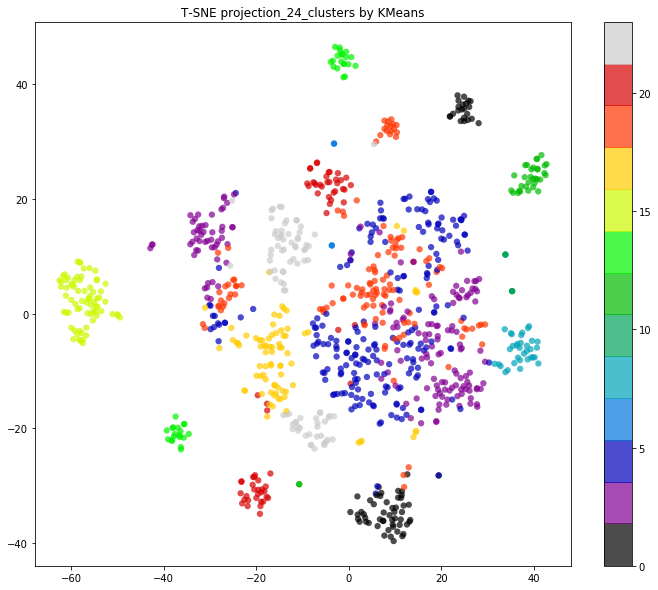

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 24, init='k-means++', n_jobs=-1)
data['KMeans_24_clust'] = pd.DataFrame(km.fit_predict(data_scaled))
plt.figure(figsize=(12,10))
plt.scatter(X_t[:, 0], X_t[:, 1], c=data['KMeans_24_clust'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 13))
plt.colorbar()
plt.title('T-SNE projection_24_clusters by KMeans')

In [19]:
data.to_csv('data_processed.csv', index=False)    # сохраняем сразу, чтобы потом заново все не делать